In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fuerza Bruta

In [25]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [34]:
reeses = cv2.imread('reeses_puffs1.png',0)

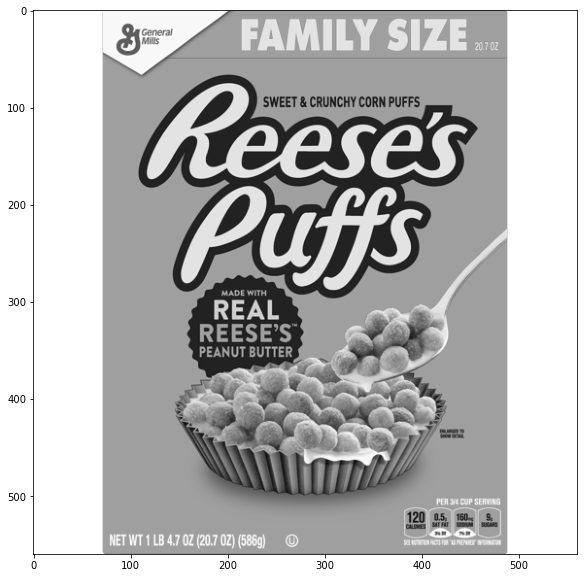

In [35]:
display(reeses)

In [36]:
cereals = cv2.imread('many_cereals.jpg',0)

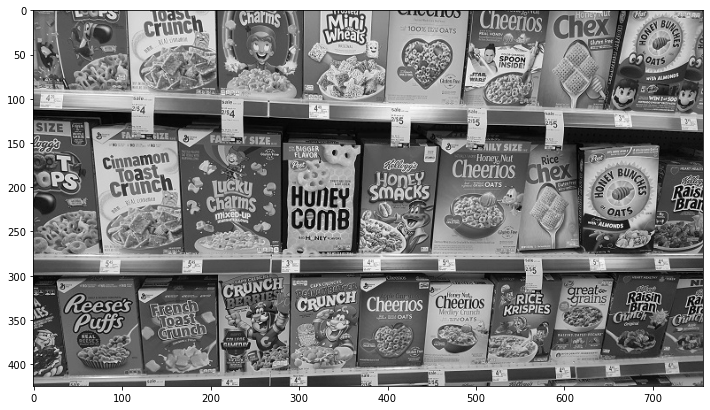

In [37]:
display(cereals)

In [38]:
orb = cv2.ORB_create()

In [39]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [40]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [41]:
matches = bf.match(des1, des2)

In [89]:
#matches
single_match = matches[0]

In [44]:
single_match.distance

70.0

In [45]:
matches = sorted(matches,key=lambda x:x.distance)

In [46]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals, kp2, matches[:25], None, flags=2)

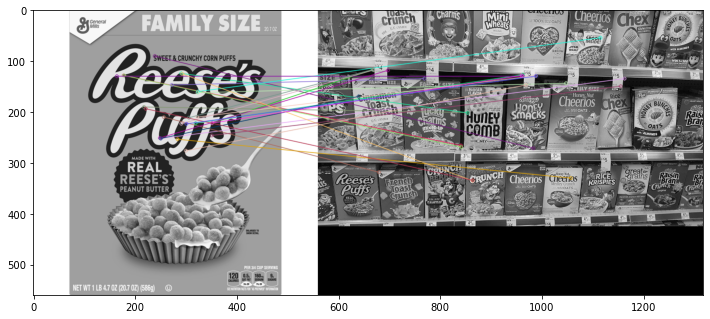

In [47]:
display(reeses_matches)

## Descriptores SIFT

In [49]:
sift = cv2.SIFT_create()

In [51]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [52]:
bf = cv2.BFMatcher()

In [54]:
matches = bf.knnMatch(des1, des2,k=2)

In [59]:
good = []

# Menor distancia == mejor coincidencia
# Ratio Test
for match1, match2 in matches:
    #If Match1 distance es menor que el 75% de Match 2 distance
    #Then el descriptor tuvo un buen match, mantener este
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [60]:
len(good)

77

In [61]:
len(matches)

1494

In [92]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

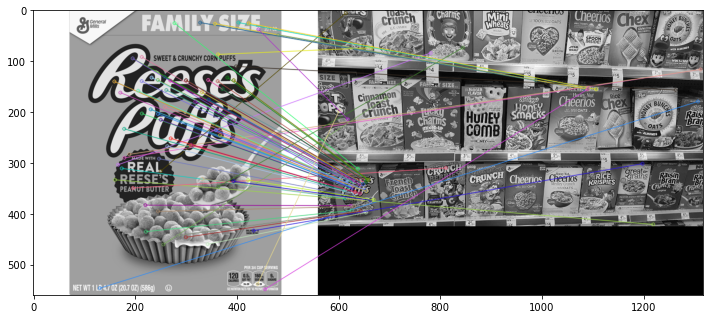

In [93]:
display(sift_matches)

In [65]:
#matches


## FLANN

In [66]:
sift = cv2.SIFT_create()

In [67]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [68]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [69]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [71]:
matches = flann.knnMatch(des1,des2,k=2)

In [72]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

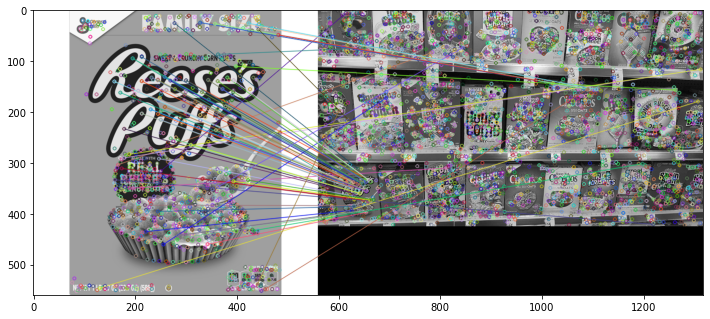

In [95]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

In [77]:
matchesMask = [[0, 0] for i in range(len(matches))]
# matchesMask

In [78]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [96]:
draw_params = dict(matchColor=(0, 0, 255), singlePointColor=(255,0,0), matchesMask=matchesMask, flags=2) #flags=2

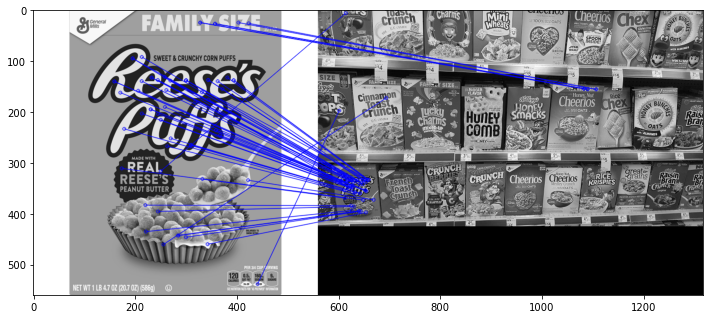

In [97]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)